Had to figure out what the Manhattan Distance was at first.. and I will be using an example forrmula as described [here](https://math.stackexchange.com/questions/139600/how-do-i-calculate-euclidean-and-manhattan-distance-by-hand#answer-139604)

```
Given (a, b) and (c, d)..
M = |a−c| + |b−d|
```

In [1]:
def manhattan_distance(coord_1, coord_2):
    a, b = coord_1
    c, d = coord_2
    
    return sum([abs(a - c), abs(b - d)])

In [2]:
# let's try it
print(manhattan_distance((1, 1), (2, 2)))
print(manhattan_distance((1, 1), (3, 3)))

_**d-o-p-e**_

In [3]:
from collections import defaultdict

import pandas as pd # this will be nice to help view the data
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [5]:
# the coords in the dataset are as (x, y) but I want it as (y, x) or (row, col)
with open('./input.txt') as f:
    coords = [tuple(map(int, [*coord.split(', ')][::-1])) for coord in f.read().splitlines()]

In [6]:
coords[:10]

[(246, 355),
 (215, 259),
 (247, 166),
 (341, 280),
 (91, 54),
 (209, 314),
 (272, 256),
 (313, 149),
 (274, 217),
 (144, 299)]

In [7]:
# I want to create a dataframe with nxm dimensions based on the outline of the datapoints
max_col, max_row = int(), int()

for row, col in coords:
    if col > max_col:
        max_col = col
        
    if row > max_row:
        max_row = row
        
max_col += 1
max_row += 1

max_col, max_row

(356, 343)

In [8]:
# This create a dataframe based on a shape, filled with defaults
chronal_df = pd.DataFrame(np.full((max_row, max_col), -1))
chronal_df.shape

(343, 356)

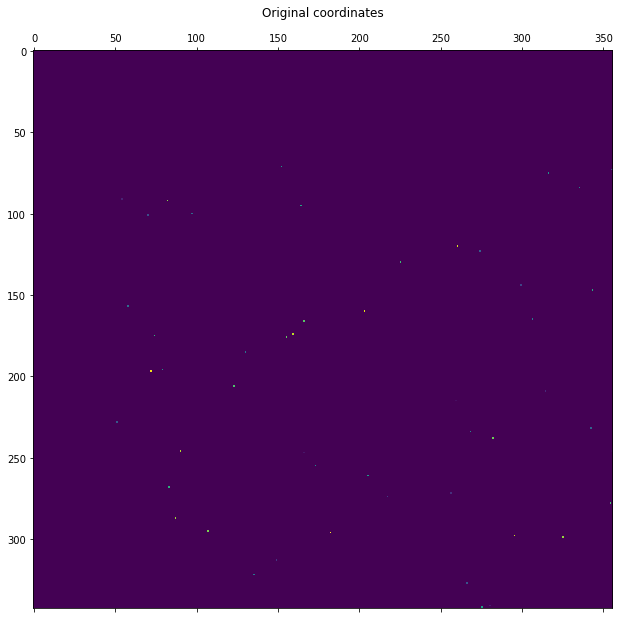

In [9]:
# put in the original coordinates to show where they will ultimately be
for ind, (row, col) in enumerate(coords):
    chronal_df.at[row, col] = ind
    
plt.matshow(chronal_df)
plt.title('Original coordinates');

In [10]:
def get_closest_point(coord, coords):
    """method that finds the index of the closest point of a coord based on a list of coords"""
    manhattan_distances = [manhattan_distance(coord, x) for x in coords]
    min_dist = min(manhattan_distances)
    
    min_indices = [ind for ind, val in enumerate(manhattan_distances) if val == min_dist]
    
    # if there are points that are equidistant away, dont assign anything
    if len(min_indices) > 1:
        return -1
    return min_indices[0]

In [11]:
# get the sq_inch count and figure out which categories live on an edge. 
# We will exclude all edge categories later on
sq_inch_cnt = defaultdict(int)
edge_categories = set()

for col in range(max_col):
    for row in range(max_row):
        if (row, col) in coords:
            sq_inch_cnt[ind] += 1
            
        else:
            ind = get_closest_point((row, col), coords)
            chronal_df.at[row, col] = ind
            
            if ind != -1:
                sq_inch_cnt[ind] += 1
            
                if any([
                    row in [0, max_row], 
                    col in [0, max_col]
                ]):
                    edge_categories.add(ind)

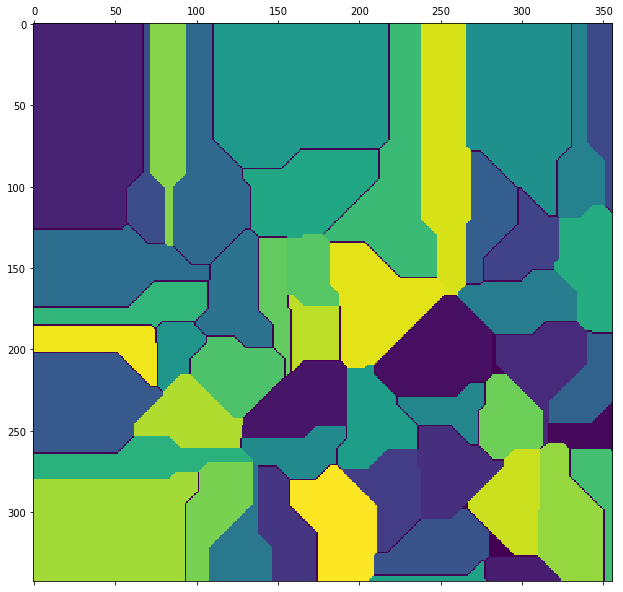

In [12]:
plt.matshow(chronal_df)
plt.savefig('plot1.png');

In [13]:
# Top one is the answer
for ind, cnt in sorted(sq_inch_cnt.items(), key=lambda x: x[1], reverse=True):
    if ind not in edge_categories:
        print(f'{ind}: {cnt}')

29: 3238
47: 3222
1: 3036
49: 2598
41: 2571
2: 2198
30: 2094
5: 2073
6: 1999
18: 1996
20: 1982
12: 1962
27: 1947
45: 1932
39: 1888
35: 1879
43: 1865
7: 1723
8: 1715
14: 1582
38: 1521
9: 1493
15: 1367
19: 1359
23: 1297
36: 1129
37: 1103
44: 1030
22: 1024
34: 971
25: 837
0: 674
3: 595
28: 265


<hr>

In [14]:
mapped_region = 0

for col in range(max_col):
    for row in range(max_row):
        if (row, col) in coords:
            coords_list = [coord for coord in coords_list if coord != (row, col)]
        else:
            coords_list = coords
        
        total_dist = sum([manhattan_distance((row, col), x) for x in coords_list])

        if total_dist < 10000:
            chronal_df.at[row, col] = len(coords) * 2
            mapped_region += 1

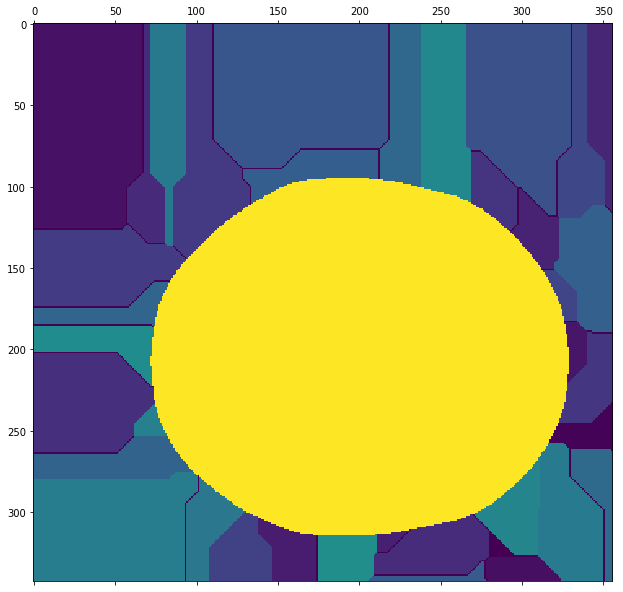

In [15]:
plt.matshow(chronal_df)
plt.savefig('plot2.png');

In [16]:
mapped_region

45046